In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define data directories
PROCESSED_DATA_DIR = '../data/processed_data/'
VISUALIZATION_DIR = '../visualizations/' # For saving plots

# Load the combined CSV file
csv_file_path = os.path.join(PROCESSED_DATA_DIR, 'nasa_battery_data_combined.csv')

try:
    df = pd.read_csv(csv_file_path)
    print("Successfully loaded combined data.")
    print("DataFrame Info:")
    df.info()
    print("\nDataFrame Head:")
    display(df.head())
    print(f"\nShape: {df.shape}")
except FileNotFoundError:
    print(f"Error: File not found at {csv_file_path}")
    df = None
except Exception as e:
    print(f"Error loading CSV: {e}")
    df = None

Successfully loaded combined data.
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497592 entries, 0 to 1497591
Data columns (total 11 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   battery_id                 1497592 non-null  object 
 1   cycle_number               1497592 non-null  int64  
 2   cycle_type                 1497592 non-null  object 
 3   ambient_temperature        1497592 non-null  int64  
 4   measurement_time_relative  1497592 non-null  float64
 5   voltage_measured           1497590 non-null  float64
 6   current_measured           1497590 non-null  float64
 7   temperature_measured       1497590 non-null  float64
 8   voltage_load_or_charge     1497592 non-null  float64
 9   current_load_or_charge     1497592 non-null  float64
 10  capacity                   135436 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 125.7+ MB

DataFrame Head:


,battery_id,cycle_number,cycle_type,ambient_temperature,measurement_time_relative,voltage_measured,current_measured,temperature_measured,voltage_load_or_charge,current_load_or_charge,capacity
0,B0005,1,charge,24,0.000,3.873017,-0.001201,24.655358,0.003,0.000,NaN
1,B0005,1,charge,24,2.532,3.479394,-4.030268,24.666480,1.570,-4.036,NaN
2,B0005,1,charge,24,5.500,4.000588,1.512731,24.675394,4.726,1.500,NaN
3,B0005,1,charge,24,8.344,4.012395,1.509063,24.693865,4.742,1.500,NaN
4,B0005,1,charge,24,11.125,4.019708,1.511318,24.705069,4.753,1.500,NaN



Shape: (1497592, 11)


## 3.1 Check for Missing Values 

In [16]:
if df is not None:
    print("\nMissing values per column:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0]) # Only show columns with missing values


Missing values per column:
capacity    1362154
dtype: int64


### Handle Missing Values

I drop the rows with missing values in the measurement columns.

In [17]:
if df is not None:
    print("\nMissing values per column (Initial):")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    # Handle the few missing measurement values
    measurement_cols_with_nan = ['voltage_measured', 'current_measured', 'temperature_measured']
    rows_before = df.shape[0]
    df.dropna(subset=measurement_cols_with_nan, inplace=True)
    rows_after = df.shape[0]

    print(f"\nDropped {rows_before - rows_after} rows with missing measurement values.")

    print("\nMissing values per column (After dropping measurement NaNs):")
    missing_values_after = df.isnull().sum()
    print(missing_values_after[missing_values_after > 0])
    # Only 'capacity' should remain with NaNs, which is expected.


Missing values per column (Initial):
capacity    1362154
dtype: int64

Dropped 0 rows with missing measurement values.

Missing values per column (After dropping measurement NaNs):
capacity    1362154
dtype: int64


### 'capacity' NaN is expected for non-discharge cycles. We will leave it for now.

## 3.2 Check Data Types

In [13]:
if df is not None:
    print("\nData types:")
    print(df.dtypes)


Data types:
battery_id                    object
cycle_number                   int64
cycle_type                    object
ambient_temperature            int64
measurement_time_relative    float64
voltage_measured             float64
current_measured             float64
temperature_measured         float64
voltage_load_or_charge       float64
current_load_or_charge       float64
capacity                     float64
dtype: object


## 3.3 Check for Duplicates 

In [18]:
if df is not None:
    duplicate_rows = df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


## 4.1 Outlier Analysis - Visualization 


Generating distribution plots for outlier analysis...


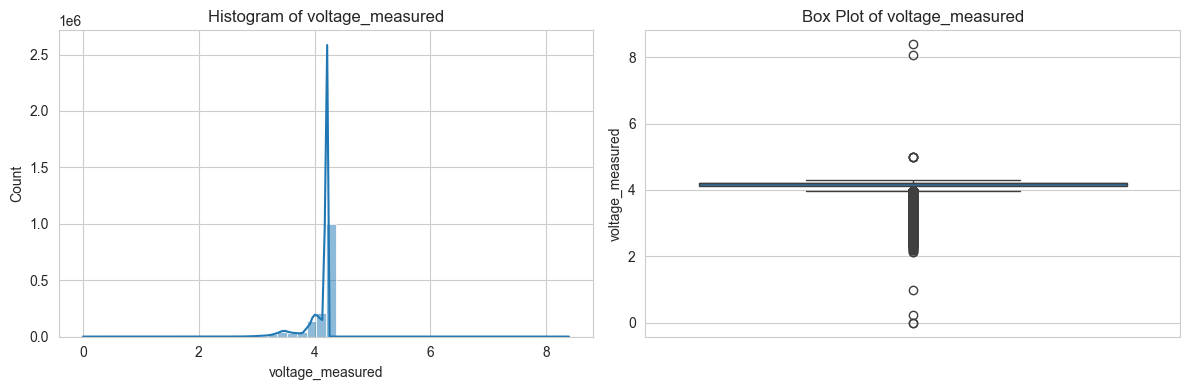

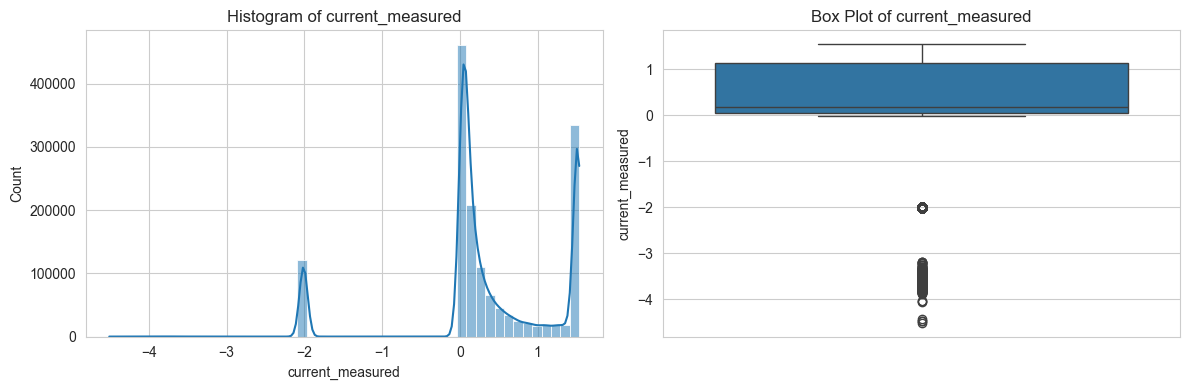

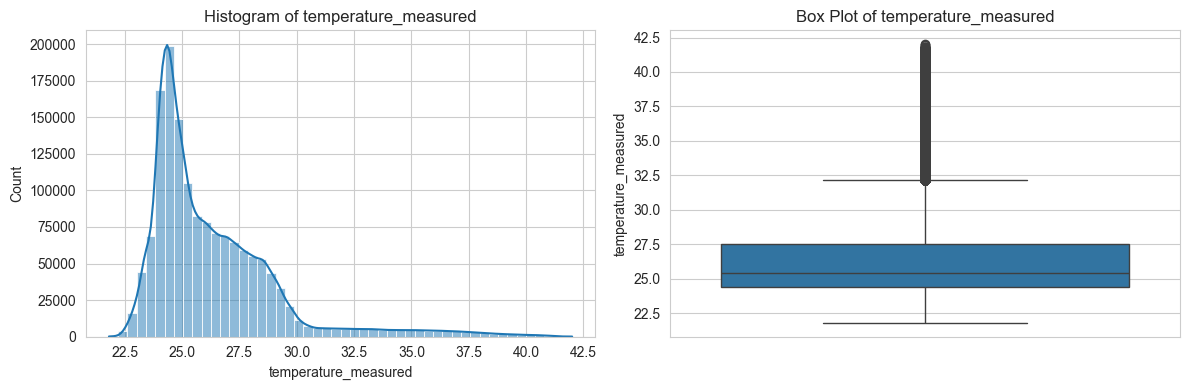

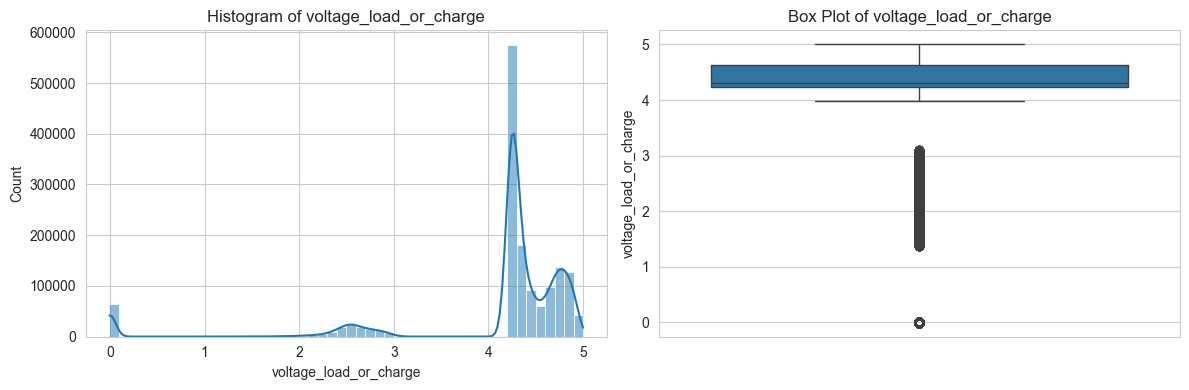

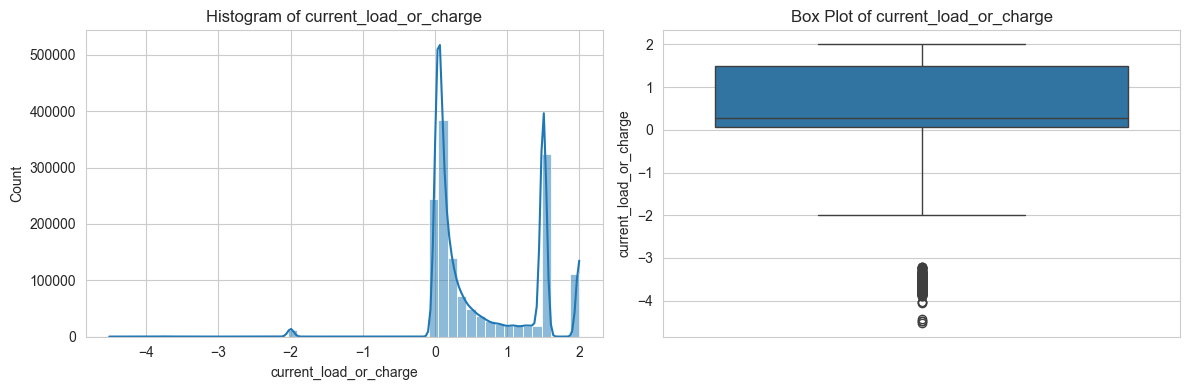

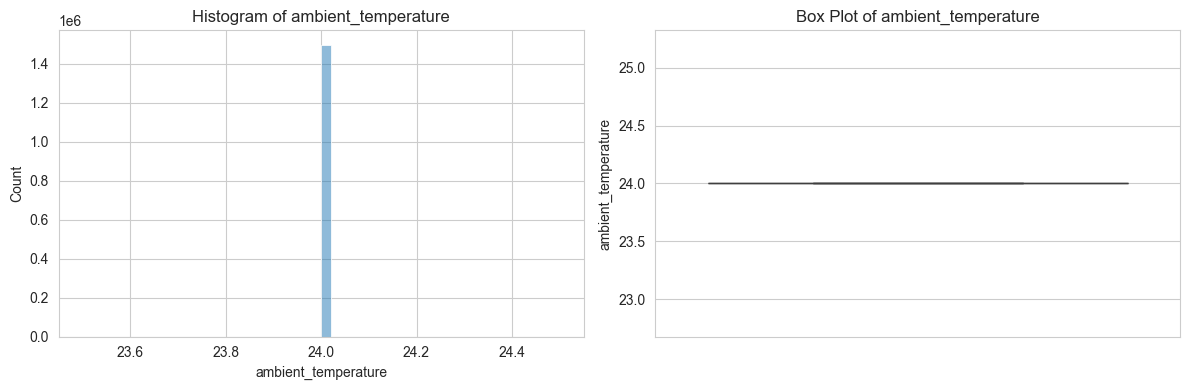


Basic descriptive statistics:


,voltage_measured,current_measured,temperature_measured,voltage_load_or_charge,current_load_or_charge,ambient_temperature
count,1.497590e+06,1.497590e+06,1.497590e+06,1.497590e+06,1.497590e+06,1497590.0
mean,4.098319e+00,3.521216e-01,2.629726e+01,4.110157e+00,6.441611e-01,24.0
std,2.243621e-01,9.141835e-01,2.835167e+00,1.033650e+00,7.301726e-01,0.0
min,-1.422157e-03,-4.508828e+00,2.181017e+01,-7.000000e-03,-4.513000e+00,24.0
25%,4.106304e+00,4.677480e-02,2.437452e+01,4.240000e+00,6.600000e-02,24.0
50%,4.197980e+00,1.770742e-01,2.541783e+01,4.299000e+00,2.690000e-01,24.0
75%,4.203183e+00,1.134874e+00,2.749151e+01,4.635000e+00,1.500000e+00,24.0
max,8.393141e+00,1.536047e+00,4.200754e+01,5.002000e+00,1.999200e+00,24.0


In [ ]:
if df is not None:
    numerical_cols_to_check = [
        'voltage_measured', 'current_measured', 'temperature_measured',
        'voltage_load_or_charge', 'current_load_or_charge', 'ambient_temperature'
    ]

    print("\nGenerating distribution plots for outlier analysis...")

    # Set plot style
    sns.set_style("whitegrid")

    # Create histograms and box plots
    for col in numerical_cols_to_check:
        plt.figure(figsize=(12, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=50)
        plt.title(f'Histogram of {col}')

        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')

        plt.tight_layout()
        # Save the plot
        plot_filename = os.path.join(VISUALIZATION_DIR, f'{col}_distribution.png')
        plt.savefig(plot_filename)
        plt.show()

    print("\nBasic descriptive statistics:")
    display(df[numerical_cols_to_check].describe())

### 4.2 Handle Voltage Outliers 

1.  **Outliers Identified:** Only 7 outliers were found outside the 0.0V - 4.5V range (a tiny fraction of the data).
2.  **Interpolation Applied:** The code successfully ran the interpolation process.
3.  **New Plots:** The updated histogram and box plot clearly show that the `voltage_measured` data is now constrained within the desired range. The previous outliers near 0V and 8V are gone. The distribution looks much cleaner.
4.  **New Statistics:** The `describe()` output confirms this: the `min` is now slightly above 0 (0.003V) and the `max` is now 4.31V, well within our physical limits.



Found 7 voltage_measured outliers outside range (0.0V, 4.5V).
Percentage of data affected: 0.0005%
Applying interpolation to replace voltage outliers...
Voltage outlier interpolation complete.

Re-plotting voltage_measured distribution after interpolation:


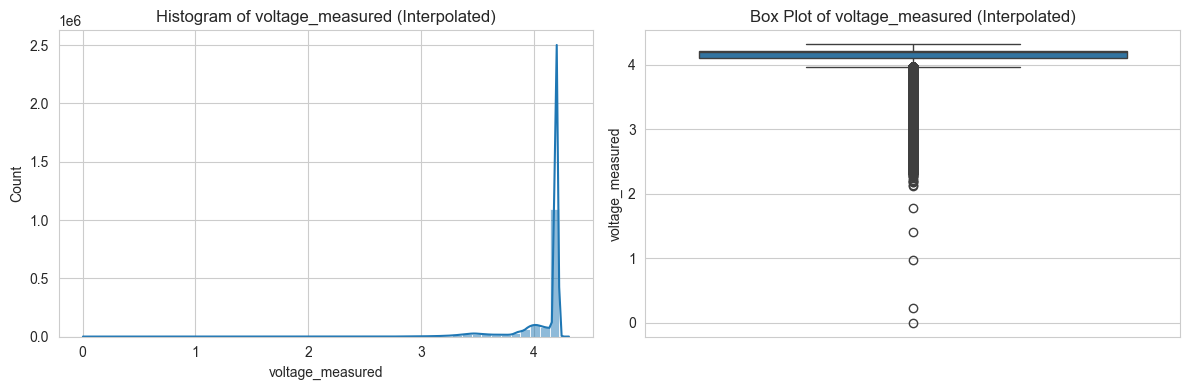


New descriptive statistics for voltage_measured:
count    1.497590e+06
mean     4.098308e+00
std      2.243070e-01
min      3.365244e-03
25%      4.106297e+00
50%      4.197980e+00
75%      4.203182e+00
max      4.313703e+00
Name: voltage_measured, dtype: float64


In [20]:
if df is not None:
    # Define plausible physical limits for voltage_measured
    VOLTAGE_MIN = 0.0 # Should not be negative
    VOLTAGE_MAX = 4.5 # Physically unlikely to exceed this significantly

    # Find outliers
    voltage_outliers_mask = (df['voltage_measured'] < VOLTAGE_MIN) | (df['voltage_measured'] > VOLTAGE_MAX)
    num_outliers = voltage_outliers_mask.sum()
    print(f"\nFound {num_outliers} voltage_measured outliers outside range ({VOLTAGE_MIN}V, {VOLTAGE_MAX}V).")
    print(f"Percentage of data affected: {num_outliers / len(df) * 100:.4f}%")

    if num_outliers > 0:
        print("Applying interpolation to replace voltage outliers...")
        # Temporarily replace outliers with NaN
        df['voltage_measured_original'] = df['voltage_measured'] # Keep original for comparison if needed
        df.loc[voltage_outliers_mask, 'voltage_measured'] = np.nan

        # Interpolate within each cycle group
        # Use linear interpolation, limit direction to avoid filling start/end NaNs with inappropriate values
        df['voltage_measured'] = df.groupby(['battery_id', 'cycle_number'])['voltage_measured'].transform(
            lambda x: x.interpolate(method='linear', limit_direction='both', limit_area=None)
        )

        # Check if any NaNs remain (could happen if a whole cycle was outliers)
        remaining_nans = df['voltage_measured'].isnull().sum()
        if remaining_nans > 0:
            print(f"Warning: {remaining_nans} voltage NaNs remain after interpolation (possibly entire cycles). Filling with forward/backward fill.")
            # Apply forward fill then backward fill as a fallback
            df['voltage_measured'] = df.groupby(['battery_id', 'cycle_number'])['voltage_measured'].ffill().bfill()

        print("Voltage outlier interpolation complete.")

        # --- Optional: Visualize again to confirm ---
        print("\nRe-plotting voltage_measured distribution after interpolation:")
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df['voltage_measured'], kde=True, bins=50)
        plt.title(f'Histogram of voltage_measured (Interpolated)')
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df['voltage_measured'])
        plt.title(f'Box Plot of voltage_measured (Interpolated)')
        plt.tight_layout()
        plot_filename = os.path.join(VISUALIZATION_DIR, f'voltage_measured_distribution_interpolated.png')
        plt.savefig(plot_filename)
        plt.show()

        print("\nNew descriptive statistics for voltage_measured:")
        print(df['voltage_measured'].describe())

    else:
        print("No voltage outliers outside the defined range found.")

## 5. Calculate State of Health (SoH) 

In [22]:
if df is not None:
    print("\nCalculating State of Health (SoH)...")

    # Ensure capacity is numeric, errors='coerce' will turn non-numeric into NaN
    df['capacity'] = pd.to_numeric(df['capacity'], errors='coerce')

    # Find the initial capacity for each battery (capacity of the first discharge cycle)
    initial_capacities = df.loc[df['cycle_type'] == 'discharge'].groupby('battery_id')['capacity'].first()

    print("\nInitial Capacities found:")
    print(initial_capacities)

    # Map initial capacity back to the dataframe
    df['initial_capacity'] = df['battery_id'].map(initial_capacities)

    # Calculate SoH for discharge cycles
    df['soh'] = np.nan # Initialize SoH column
    discharge_mask = df['cycle_type'] == 'discharge'
    # Avoid division by zero or NaN initial capacity
    valid_capacity_mask = discharge_mask & df['capacity'].notna() & df['initial_capacity'].notna() & (df['initial_capacity'] > 0)

    df.loc[valid_capacity_mask, 'soh'] = df.loc[valid_capacity_mask, 'capacity'] / df.loc[valid_capacity_mask, 'initial_capacity']

    # Propagate the calculated SoH to all measurements within the same cycle
    # Group by battery and cycle, then forward/backward fill the SoH value within each group
    df['soh'] = df.groupby(['battery_id', 'cycle_number'])['soh'].transform(lambda x: x.ffill().bfill())

    # Check SoH results
    print("\nSoH calculation complete. Checking results:")
    print("SoH descriptive statistics (overall):")
    print(df['soh'].describe())

    print("\nSoH values for first few discharge cycles of B0005:")
    print(df.loc[(df['battery_id'] == 'B0005') & (df['cycle_type'] == 'discharge'), ['cycle_number', 'capacity', 'soh']].drop_duplicates().head(10))

    print("\nSoH values for last few discharge cycles of B0005:")
    print(df.loc[(df['battery_id'] == 'B0005') & (df['cycle_type'] == 'discharge'), ['cycle_number', 'capacity', 'soh']].drop_duplicates().tail(10))

    # Remove the temporary initial_capacity column if desired
    # df = df.drop(columns=['initial_capacity'])


Calculating State of Health (SoH)...

Initial Capacities found:
battery_id
B0005    1.856487
B0006    2.035338
B0018    1.855005
Name: capacity, dtype: float64

SoH calculation complete. Checking results:
SoH descriptive statistics (overall):
count    135436.000000
mean          0.810074
std           0.111896
min           0.566893
25%           0.726306
50%           0.800384
75%           0.906684
max           1.000000
Name: soh, dtype: float64

SoH values for first few discharge cycles of B0005:
       cycle_number  capacity       soh
789               2  1.856487  1.000000
1926              4  1.846327  0.994527
3059              6  1.835349  0.988614
4187              8  1.835263  0.988567
5318             10  1.834646  0.988235
6464             12  1.835662  0.988782
7611             14  1.835146  0.988504
8726             16  1.825757  0.983447
9838             18  1.824774  0.982917
10949            20  1.824613  0.982831

SoH values for last few discharge cycles of B0005:
 

## 6. Apply Savitzky-Golay Filter for Smoothing 


Applying Savitzky-Golay filter for smoothing...
Smoothing voltage_measured...
Smoothing current_measured...
Smoothing temperature_measured...
Smoothing complete.

Visualizing smoothing effect on one cycle (e.g., B0005, Cycle 2, Discharge)...


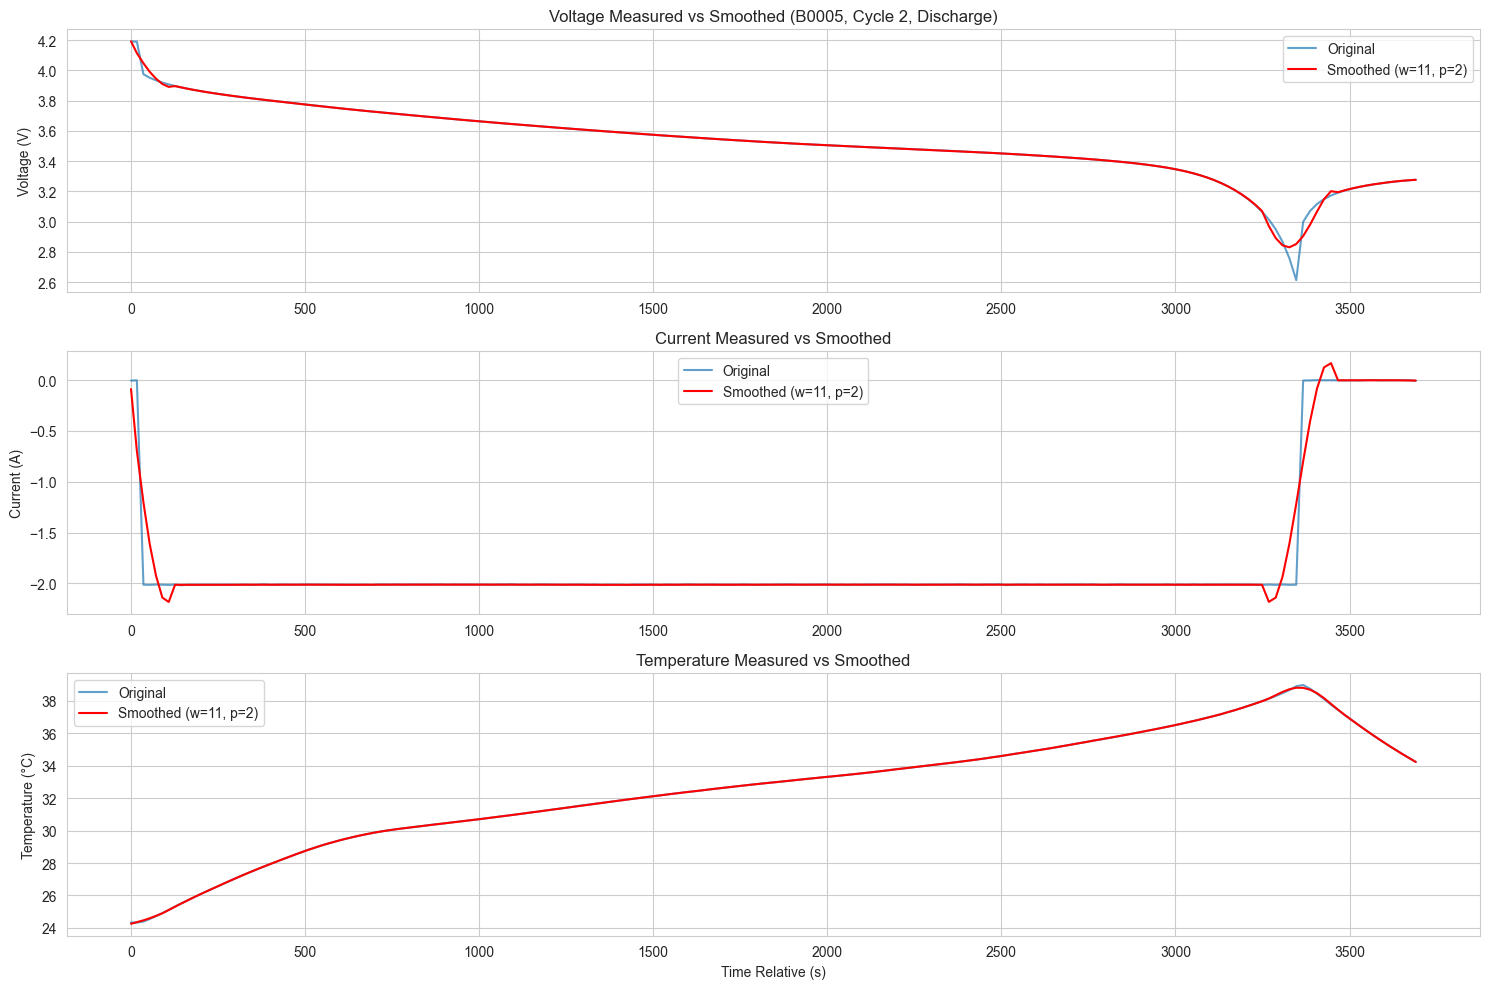


DataFrame Head with Smoothed Columns:


,voltage_measured,voltage_measured_smooth,current_measured,current_measured_smooth,temperature_measured,temperature_measured_smooth
0,3.873017,3.725090,-0.001201,-1.459122,24.655358,24.653435
1,3.479394,3.808583,-4.030268,-0.602013,24.666480,24.666549
2,4.000588,3.880187,1.512731,0.124619,24.675394,24.679553
3,4.012395,3.939903,1.509063,0.720772,24.693865,24.692448
4,4.019708,3.987730,1.511318,1.186448,24.705069,24.705234


In [24]:
from scipy.signal import savgol_filter

if df is not None:
    print("\nApplying Savitzky-Golay filter for smoothing...")

    # --- Parameters ---
    # Choose based on experimentation; larger window = more smoothing
    # Must be odd; polyorder < window_length
    window_length = 11
    polyorder = 2

    cols_to_smooth = ['voltage_measured', 'current_measured', 'temperature_measured']

    # Apply filter group-wise within each cycle
    for col in cols_to_smooth:
        print(f"Smoothing {col}...")
        # Create a new column for the smoothed data
        smoothed_col_name = f"{col}_smooth"

        # Use transform to apply filter within each group
        # Handle short cycles where window_length might be too large
        def apply_savgol(series):
            if len(series) < window_length:
                # Not enough points for the filter window, return original or handle differently
                # Returning original is safer than returning NaNs or crashing
                return series
            try:
                 # mode='interp' handles boundaries by using interpolated values
                return savgol_filter(series, window_length, polyorder, mode='interp')
            except ValueError as e:
                # Catch potential errors, e.g., if polyorder >= window_length after filtering NaNs internally
                print(f"  Error applying SavGol to a group: {e}. Returning original series for this group.")
                return series


        df[smoothed_col_name] = df.groupby(['battery_id', 'cycle_number'])[col].transform(apply_savgol)

    print("Smoothing complete.")

    # --- Optional: Visualize comparison for one cycle ---
    print("\nVisualizing smoothing effect on one cycle (e.g., B0005, Cycle 2, Discharge)...")
    # Try Cycle 2 which is the first discharge cycle
    example_cycle = df[(df['battery_id'] == 'B0005') & (df['cycle_number'] == 2) & (df['cycle_type'] == 'discharge')].copy()

    if not example_cycle.empty:
        plt.figure(figsize=(15, 10))

        # Voltage
        plt.subplot(3, 1, 1)
        plt.plot(example_cycle['measurement_time_relative'], example_cycle['voltage_measured'], label='Original', alpha=0.7)
        plt.plot(example_cycle['measurement_time_relative'], example_cycle['voltage_measured_smooth'], label=f'Smoothed (w={window_length}, p={polyorder})', color='red')
        plt.title('Voltage Measured vs Smoothed (B0005, Cycle 2, Discharge)')
        plt.ylabel('Voltage (V)')
        plt.legend()
        plt.grid(True)

        # Current
        plt.subplot(3, 1, 2)
        plt.plot(example_cycle['measurement_time_relative'], example_cycle['current_measured'], label='Original', alpha=0.7)
        plt.plot(example_cycle['measurement_time_relative'], example_cycle['current_measured_smooth'], label=f'Smoothed (w={window_length}, p={polyorder})', color='red')
        plt.title('Current Measured vs Smoothed')
        plt.ylabel('Current (A)')
        plt.legend()
        plt.grid(True)

        # Temperature
        plt.subplot(3, 1, 3)
        plt.plot(example_cycle['measurement_time_relative'], example_cycle['temperature_measured'], label='Original', alpha=0.7)
        plt.plot(example_cycle['measurement_time_relative'], example_cycle['temperature_measured_smooth'], label=f'Smoothed (w={window_length}, p={polyorder})', color='red')
        plt.title('Temperature Measured vs Smoothed')
        plt.xlabel('Time Relative (s)')
        plt.ylabel('Temperature (°C)')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plot_filename = os.path.join(VISUALIZATION_DIR, f'B0005_C2_smoothing_comparison.png') # Updated filename
        plt.savefig(plot_filename)
        plt.show()
    else:
        print("Could not find example cycle (B0005, Cycle 2, Discharge) to plot.")

    # Display head with new smoothed columns
    print("\nDataFrame Head with Smoothed Columns:")
    display(df[['voltage_measured', 'voltage_measured_smooth',
                'current_measured', 'current_measured_smooth',
                'temperature_measured', 'temperature_measured_smooth']].head())

## Save Preprocessed Data 

In [26]:

if df is not None:
    output_file_preprocessed = os.path.join(PROCESSED_DATA_DIR, 'nasa_battery_data_preprocessed.csv')
    print(f"\nSaving preprocessed data to {output_file_preprocessed}...")
    try:
        # Select relevant columns to save (including smoothed ones, SoH)
        # Exclude temporary columns like voltage_measured_original if not needed
        cols_to_save = [col for col in df.columns if col != 'voltage_measured_original']
        df[cols_to_save].to_csv(output_file_preprocessed, index=False)
        print("Save complete.")
    except Exception as e:
        print(f"Error saving preprocessed DataFrame: {e}")


Saving preprocessed data to ../data/processed_data/nasa_battery_data_preprocessed.csv...
Save complete.
